In [2]:
# the following command allows to show graphs after the call and not in a separate window
%matplotlib inline


from random import randint, seed
# to generate random numbers

from enum import Enum
# something like a list ? Allows to name boolean ?

import matplotlib.pyplot as plt
# to make plots


In [3]:
class Strategy(Enum):
    CHANGE = 1
    KEEP = 0

In [4]:
def play_game(strategy):
    '''Simulate a Monty Hall game:
       https://en.wikipedia.org/wiki/Monty_Hall_problem
    
    Args:
        strategy (Strategy): player's strategy
    
    Returns:
        bool : the player won ?
    '''
    

    doors = [0, 1, 2] # we have 3 doors called 0,1,2
    
    winning_door = randint(0,2) # one random door is the winning one
    
    # player's choice
    first_choice = randint(0,2) # it's a random choice
    
    # we remove the player's choice from the doors list
    doors.remove(first_choice)
   
    # now len(doors) = 2 -> doors[0], doors[1]
    
    # The host remove one of the two remaining doors containing a goat
    if first_choice == winning_door:
        doors.remove(doors[randint(0,1)]) # if player chose the winning door, we remove one of 
                                          # the other two because both have a goat behind
    else:
        doors = [winning_door] # otherwise (the player's first choice was a goat) the host removes 
                               # the other goat and in doors we have only the winning door
    
    # now len(doors) = 1 -> doors[0]
    
    second_choice = 0  # initialize to 0
    
    # Second choice depend on the player's strategy
    if strategy == Strategy.CHANGE:
        second_choice = doors[0] # player picks the remaining door
    elif strategy == Strategy.KEEP:
        second_choice = first_choice # player keep his/her first choice
    else:
        raise ValueError("Strategy not known!")
    
    return second_choice == winning_door # the function return a boolean: True if the player won

In [7]:
play_game(Strategy.KEEP) # just to test if the code is working

False

In [8]:
def play(strategy, nb_tries):
    '''Function allowing to play nb_tries games with a given strategy       
    Args:
        strategy (Strategy): player's strategy
        nb_tries (int): number of games
        
    Returns:
        list: list containing the number of times the player won with that strategy
    '''
    
    # This is a comprehension list 
    return [1 if play_game(strategy) else 0 for i in range(nb_tries)]

In [9]:
print("By keeping his/her choice, the player won {} times out of 10000 games.".format(sum(play(Strategy.KEEP, 10000))))

By keeping his/her choice, the player won 3315 times out of 10000 games.


In [10]:
print("By changing his/her mind, the player won {} times out of 10000 games.".format(sum(play(Strategy.CHANGE, 10000))))

By changing his/her mind, the player won 6666 times out of 10000 games.


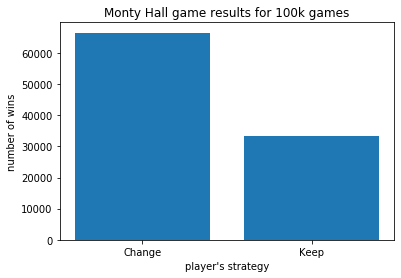

In [16]:
# More interesting is to show an histogram (plt.bar) with the results:
figure = plt.figure()
plt.title('Monty Hall game results for 100k games')
plt.xlabel("player's strategy")
plt.ylabel("number of wins")
plot = plt.bar([1,2],[sum(play(Strategy.CHANGE, 100000)), sum(play(Strategy.KEEP, 100000))], tick_label=["Change","Keep"])

In [12]:
# We can also plot the evolution of wins for the two strategy as a function of the games played using a scatter plot:
wins_changing = [] # lists containing the event lists for every sample
wins_keeping = []
samples = [1000, 10000, 20000, 50000, 80000, 100000] # i.e. steps of played games
for tries in samples:
    wins_changing.append(play(Strategy.CHANGE, tries))
    wins_keeping.append(play(Strategy.KEEP, tries))

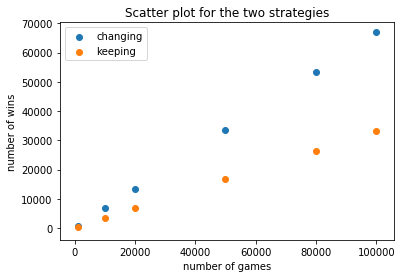

In [15]:
figure = plt.figure() # initializing the plot canvas (following commands will be hooked to it)
plt.title('Scatter plot for the two strategies')
plt.xlabel("number of games")
plt.ylabel("number of wins")
plot = plt.scatter(samples, [sum(x) for x in wins_changing], label="changing")
plot = plt.scatter(samples, [sum(x) for x in wins_keeping], label="keeping")
legend = plt.legend()

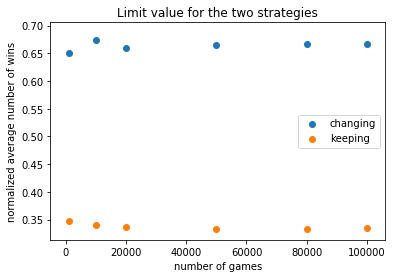

In [18]:
# Finally, we can plot the average number of wins for each strategy as a function of the number of games to see the expected value (i.e. the limit of the distribution)
av_wins_changing = []
av_wins_keeping = []
for tries in samples:
    av_wins_changing.append(sum(play(Strategy.CHANGE, tries))/tries)
    av_wins_keeping.append(sum(play(Strategy.KEEP, tries))/tries)

figure = plt.figure()
plt.title('Limit value for the two strategies')
plt.xlabel("number of games")
plt.ylabel("normalized average number of wins")
plot = plt.scatter(samples, [x for x in av_wins_changing], label="changing") 
plot = plt.scatter(samples, [x for x in av_wins_keeping], label="keeping")
legend = plt.legend()